**KLASIFIKASI LOAN APPROVAL MENGGUNAKAN LOGISTIC REGRESSION, DECISION TREE, SUPPORT VECTOR MACHINE, RANDOM FOREST, NAIVE BAYES, DAN K-NEAREST NEIGHBORS**

In [1]:
#Impor data dari device
from google.colab import files
files.upload()

Saving loan_data.csv to loan_data.csv


{'loan_data.csv': b'person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status\n22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1\n21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0\n25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1\n23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1\n24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1\n21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1\n26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1\n24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1\n24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.9,0.35,2.0,544,No,1\n21.0,female,High School,12739.0,0,OWN,1600.

In [2]:
#Membaca data
import pandas as pd
data=pd.read_csv('loan_data.csv')
data

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

Exploratory Data Analysis (EDA)

In [3]:
#Informasi data (jumlah kolom, baris, tipe data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

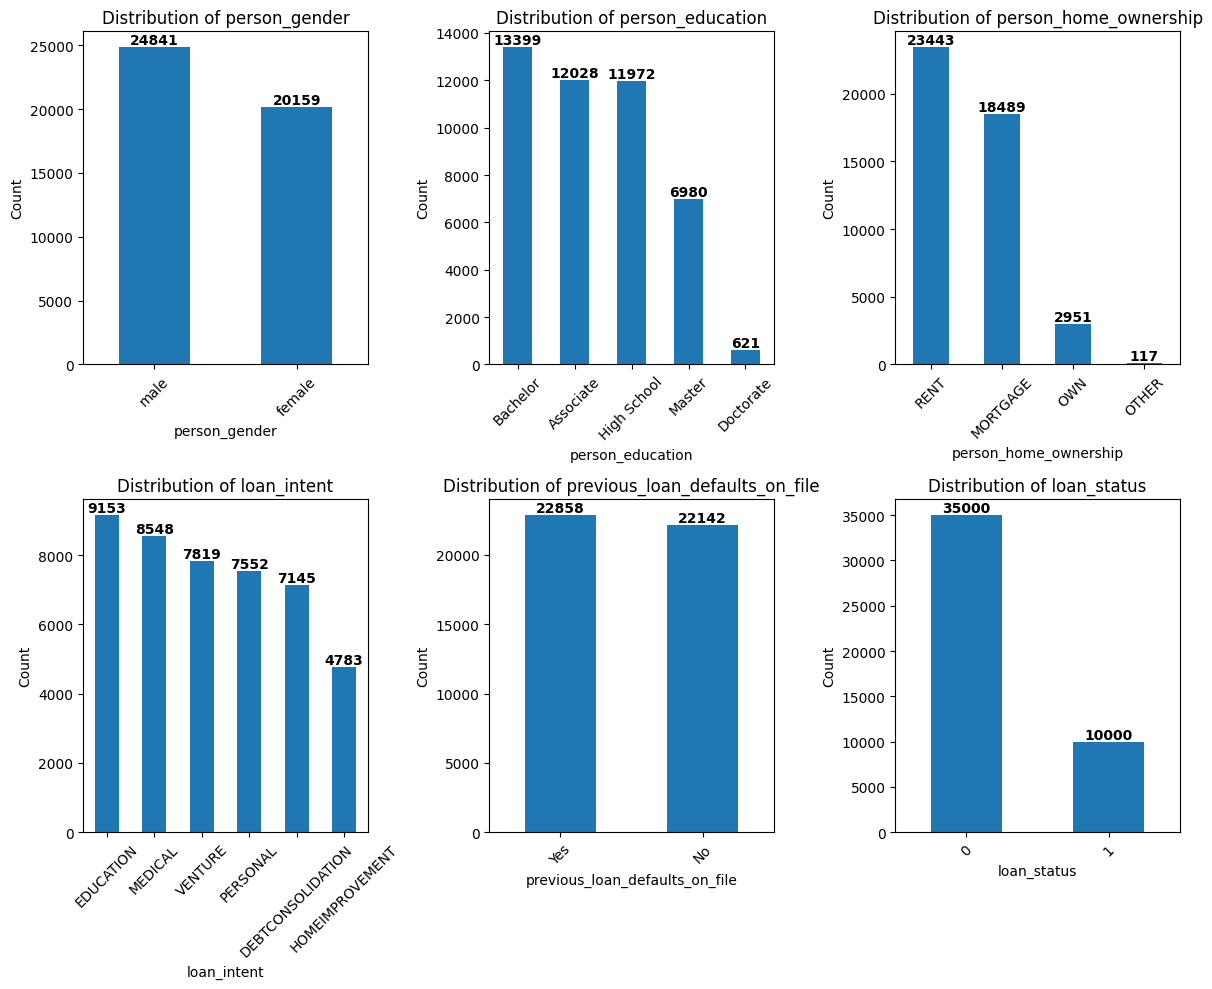

In [4]:
#Visualisasi distribusi data dengan bar chat
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 10)) #Membuat subplot (baris, kolom, ukuran plot)
features = ['person_gender','person_education','person_home_ownership',
            'loan_intent','previous_loan_defaults_on_file','loan_status']

#Perulangan untuk plotting setiap fitur
for ax, feature in zip(axes.flatten(), features):
    value_counts = data[feature].value_counts()
    bars = value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                str(int(bar.get_height())),
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

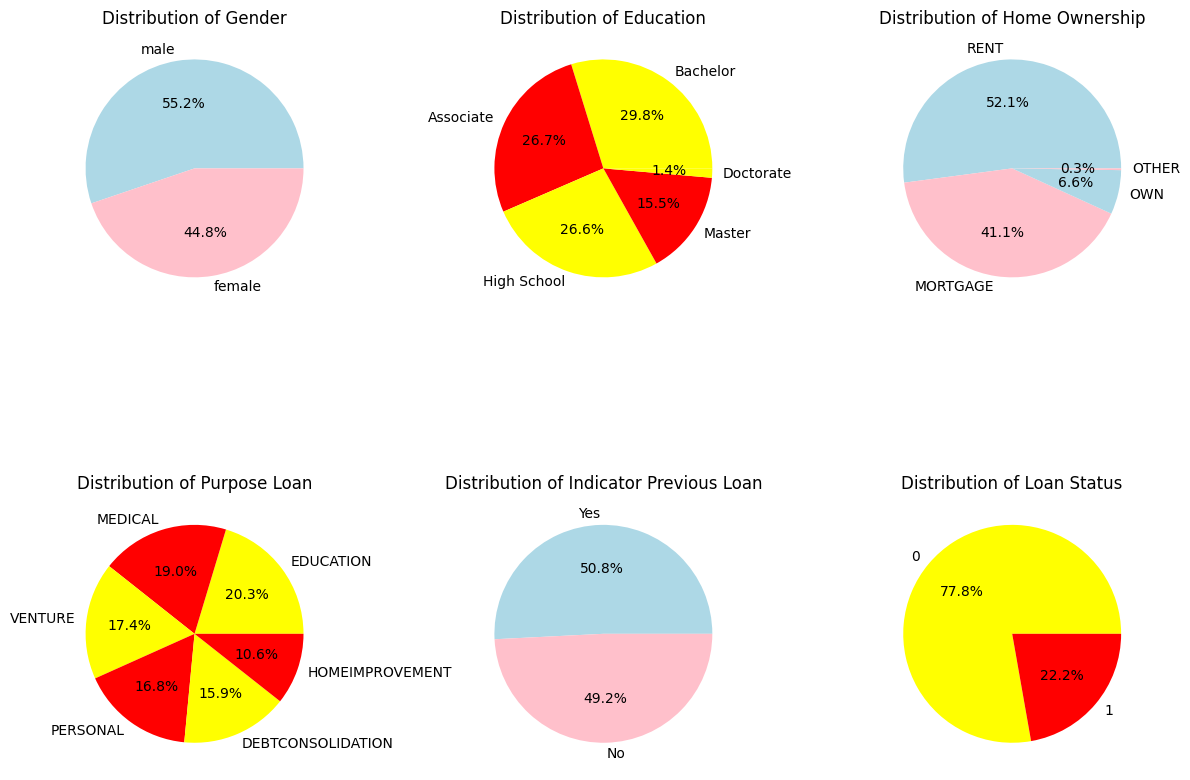

In [5]:
#Visualisasi distribusi data dengan pie chart
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 10))  #Membuat subplot (baris, kolom, ukuran)

gender_counts = data['person_gender'].value_counts()
axes[0,0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[0,0].set_title("Distribution of Gender")

education_counts = data['person_education'].value_counts()
axes[0,1].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['yellow', 'red'])
axes[0,1].set_title("Distribution of Education")

home_counts = data['person_home_ownership'].value_counts()
axes[0,2].pie(home_counts, labels=home_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[0,2].set_title("Distribution of Home Ownership")

intent_counts = data['loan_intent'].value_counts()
axes[1,0].pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', colors=['yellow', 'red'])
axes[1,0].set_title("Distribution of Purpose Loan")

prev_counts = data['previous_loan_defaults_on_file'].value_counts()
axes[1,1].pie(prev_counts, labels=prev_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[1,1].set_title("Distribution of Indicator Previous Loan")

status_counts = data['loan_status'].value_counts()
axes[1,2].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['yellow', 'red'])
axes[1,2].set_title("Distribution of Loan Status")

plt.tight_layout()
plt.show()


In [6]:
#Merubah format data yang berbentuk objek

mapping_gender = {'male': 0, 'female': 1}
mapping_edu = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master':3, 'Doctorate':4} #Ordinal=>harus sesuai urutan
mapping_home = {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER':3}
mapping_intent = {'EDUCATION': 0, 'MEDICAL': 1, 'VENTURE': 2, 'PERSONAL':3, 'DEBTCONSOLIDATION':4, 'HOMEIMPROVEMENT':5}
mapping_previous = {'No': 0, 'Yes': 1}

data[['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']] = data[['person_gender',
  'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']].replace({
    'person_gender': mapping_gender,'person_education': mapping_edu,
    'person_home_ownership': mapping_home,'loan_intent': mapping_intent,'previous_loan_defaults_on_file': mapping_previous})
data

<ipython-input-6-584bd178c39b>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']].replace({


person_age  person_gender  person_education  person_income  \
0            22.0              1                 3        71948.0   
1            21.0              1                 0        12282.0   
2            25.0              1                 0        12438.0   
3            23.0              1                 2        79753.0   
4            24.0              0                 3        66135.0   
...           ...            ...               ...            ...   
44995        27.0              0                 1        47971.0   
44996        37.0              1                 1        65800.0   
44997        33.0              0                 1        56942.0   
44998        29.0              0                 2        33164.0   
44999        24.0              0                 0        51609.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0                   0                      0    35000.0            3   
1                   0                      2     1000.0            0   
2                   3                      1     5500.0            1   
3                   0                      0    35000.0            1   
4                   1                      0    35000.0            1   
...               ...                    ...        ...          ...   
44995               6                      0    15000.0            1   
44996              17                      0     9000.0            5   
44997               7                      0     2771.0            4   
44998               4                      0    12000.0            0   
44999               1                      0     6665.0            4   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44995           645                               0            1  
44996           621                               0            1  
44997           668                               0            1  
44998           604                               0            1  
44999           628                               0            1  

[45000 rows x 14 columns]

In [7]:
#Analisis deskriptif
data.describe()

person_age  person_gender  person_education  person_income  \
count  45000.000000   45000.000000      45000.000000   4.500000e+04   
mean      27.764178       0.447978          1.383333   8.031905e+04   
std        6.045108       0.497292          1.077741   8.042250e+04   
min       20.000000       0.000000          0.000000   8.000000e+03   
25%       24.000000       0.000000          0.000000   4.720400e+04   
50%       26.000000       0.000000          1.000000   6.704800e+04   
75%       30.000000       1.000000          2.000000   9.578925e+04   
max      144.000000       1.000000          4.000000   7.200766e+06   

       person_emp_exp  person_home_ownership     loan_amnt   loan_intent  \
count    45000.000000           45000.000000  45000.000000  45000.000000   
mean         5.410333               0.549822   9583.157556      2.207489   
std          6.063532               0.627919   6314.886691      1.649272   
min          0.000000               0.000000    500.000000      0.000000   
25%          1.000000               0.000000   5000.000000      1.000000   
50%          4.000000               0.000000   8000.000000      2.000000   
75%          8.000000               1.000000  12237.250000      4.000000   
max        125.000000               3.000000  35000.000000      5.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score  previous_loan_defaults_on_file   loan_status  
count  45000.000000                    45000.000000  45000.000000  
mean     632.608756                        0.507956      0.222222  
std       50.435865                        0.499942      0.415744  
min      390.000000                        0.000000      0.000000  
25%      601.000000                        0.000000      0.000000  
50%      640.000000                        1.000000      0.000000  
75%      670.000000                        1.000000      0.000000  
max      850.000000                        1.000000      1.000000

In [8]:
#Melihat apakah terdapat missing value
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
#Membagi data X dan y
from sklearn.model_selection import train_test_split
X = data.drop('loan_status', axis=1) #Hanya mengambil data selain data kelas
y = data['loan_status'] #Kolom 'loan_status' merupakan data kelas
#membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Cek distribusi kelas sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))
#Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
#Menerapkan SMOTE hanya pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Cek distribusi kelas setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

Distribusi sebelum SMOTE: Counter({0: 28000, 1: 8000})
Distribusi setelah SMOTE: Counter({0: 28000, 1: 28000})


ANALISIS MODEL

**Logistic Regression**

In [11]:
#Melatih model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Akurasi Data Uji: 0.7467777777777778

Classification Report1:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      7000
           1       0.46      0.73      0.56      2000

    accuracy                           0.75      9000
   macro avg       0.68      0.74      0.69      9000
weighted avg       0.81      0.75      0.76      9000



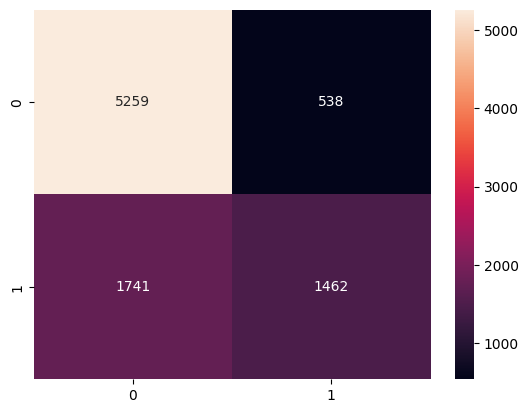

In [12]:
#Prediksi dan evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)

print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

**Decission Tree**

In [13]:
#Melatih model
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
model_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=0)

Akurasi Data Uji: 0.7467777777777778

Classification Report1:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      7000
           1       0.46      0.73      0.56      2000

    accuracy                           0.75      9000
   macro avg       0.68      0.74      0.69      9000
weighted avg       0.81      0.75      0.76      9000



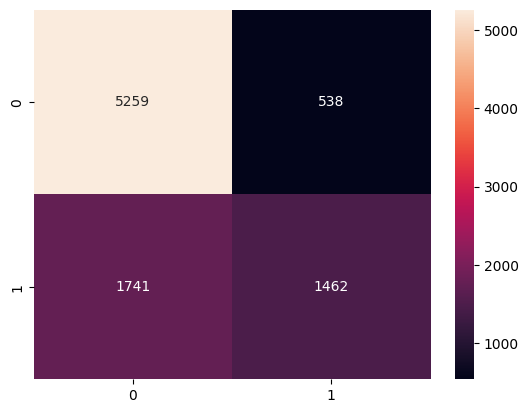

In [14]:
#Prediksi dan evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)
print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

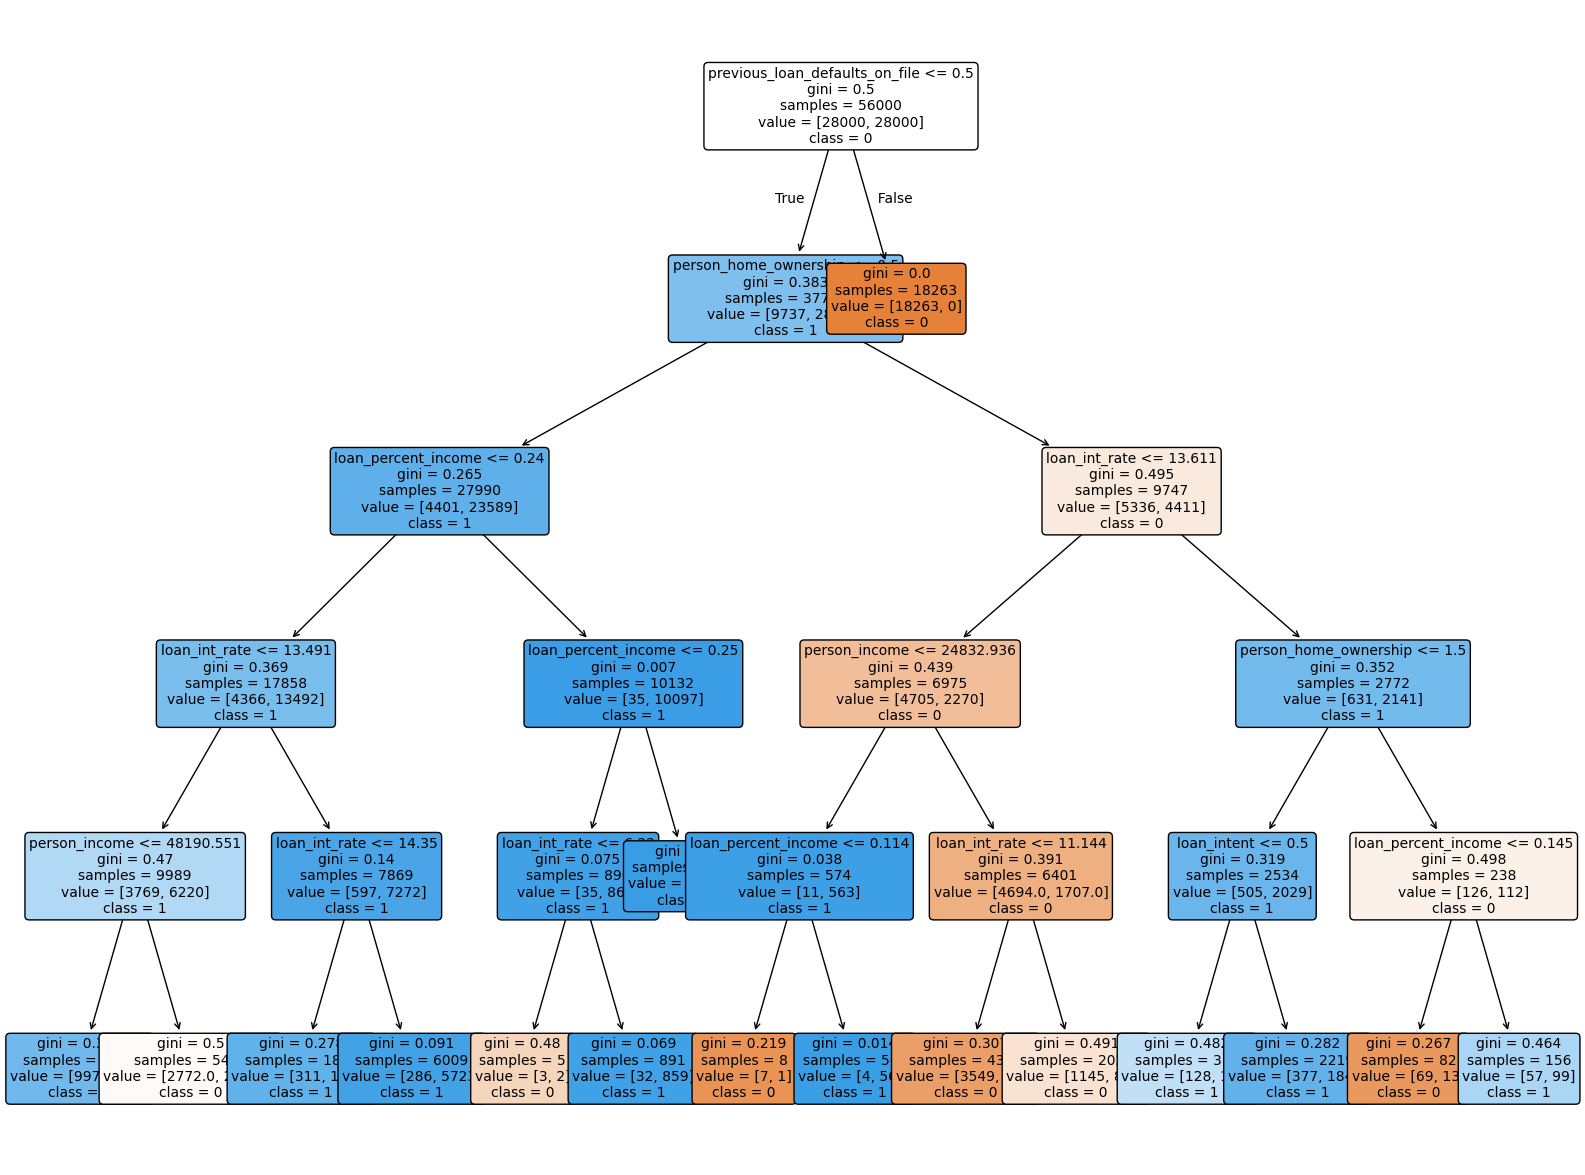

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming model_tree is your DecisionTreeClassifier
plt.figure(figsize=(20, 15))  # Atur ukuran gambar (lebar, tinggi)
tree.plot_tree(model_tree,
               filled=True,
               rounded=True,
               feature_names=X.columns, # Menampilkan nama fitur
               class_names=['0', '1'], # Menampilkan nama kelas (jika ada)
               fontsize=10) # Mengatur ukuran font
plt.show()

**Random Forest**

In [16]:
#Melatih model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=42)

Akurasi Data Uji: 0.9107777777777778

Classification Report1:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7000
           1       0.78      0.84      0.81      2000

    accuracy                           0.91      9000
   macro avg       0.86      0.89      0.87      9000
weighted avg       0.91      0.91      0.91      9000



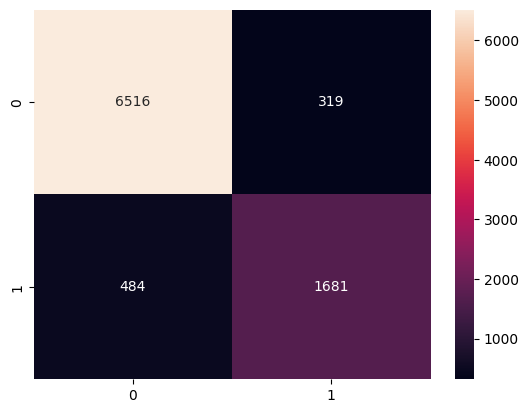

In [17]:
#Prediksi dan evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)

print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

**Naive Bayes**

In [18]:
#Melatih model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

Akurasi Data Uji: 0.4871111111111111

Classification Report1:
               precision    recall  f1-score   support

           0       0.91      0.38      0.53      7000
           1       0.29      0.87      0.43      2000

    accuracy                           0.49      9000
   macro avg       0.60      0.62      0.48      9000
weighted avg       0.77      0.49      0.51      9000



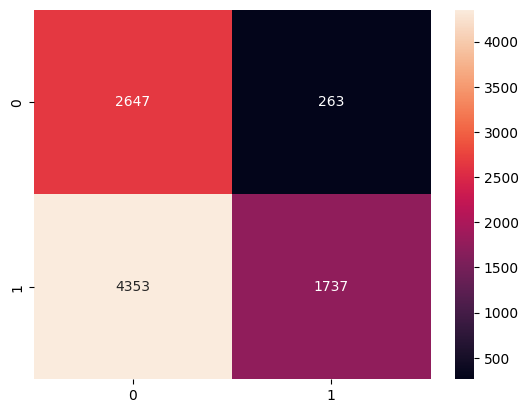

In [19]:
#Prediksi dan evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)

print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

**K-Nearest Neighbor**

In [20]:
#Melatih model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='kd_tree', metric='minkowski')
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

Akurasi Data Uji: 0.7774444444444445

Classification Report1:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      7000
           1       0.50      0.70      0.58      2000

    accuracy                           0.78      9000
   macro avg       0.70      0.75      0.71      9000
weighted avg       0.81      0.78      0.79      9000



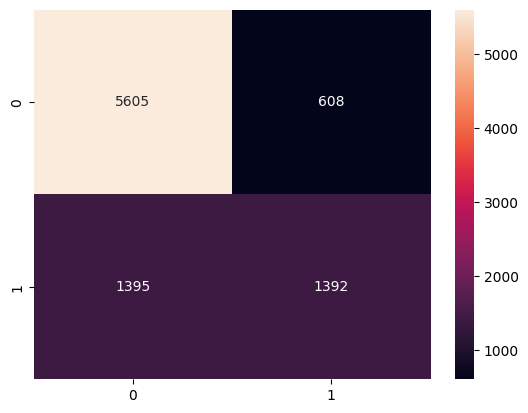

In [21]:
#Prediksi dan evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)

print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

**Support Vector Machine**

In [22]:
#Melatih model
from sklearn.svm import SVC

# Macam kernel: rbf', 'linear', 'poly', 'sigmoid'
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

Akurasi Data Uji: 0.7433333333333333

Classification Report1:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82      7000
           1       0.45      0.63      0.52      2000

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.76      9000



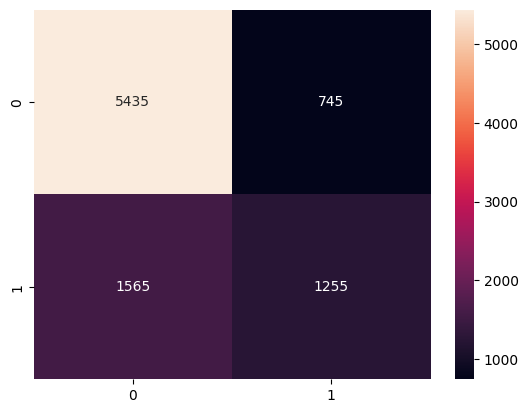

In [23]:
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_test_pred = model.predict(X_test)

print("Akurasi Data Uji:", accuracy_score(y_test,y_test_pred))
print("\nClassification Report1:\n", classification_report(y_test, y_test_pred))

def evaluation(test,pred):
  cm=confusion_matrix(pred,test)
  sns.heatmap(cm,annot=True,fmt='d')

evaluation(y_test, y_test_pred)

**Perbandingan Evaluasi Model**

In [24]:
# Dictionary untuk menyimpan model dan akurasi
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

accuracy_scores = {}

# Latih setiap model dan simpan akurasi
for name, model in models.items():
    # model.fit(X_train_resampled, y_train_resampled)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Tampilkan hasil akurasi
print("Akurasi Model:")
for name, acc in accuracy_scores.items():
    print(f"{name}: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Model:
Logistic Regression: 0.8270
Decision Tree: 0.9023
Support Vector Machine: 0.8056
Random Forest: 0.9314
Naive Bayes: 0.8062
K-NN: 0.8363


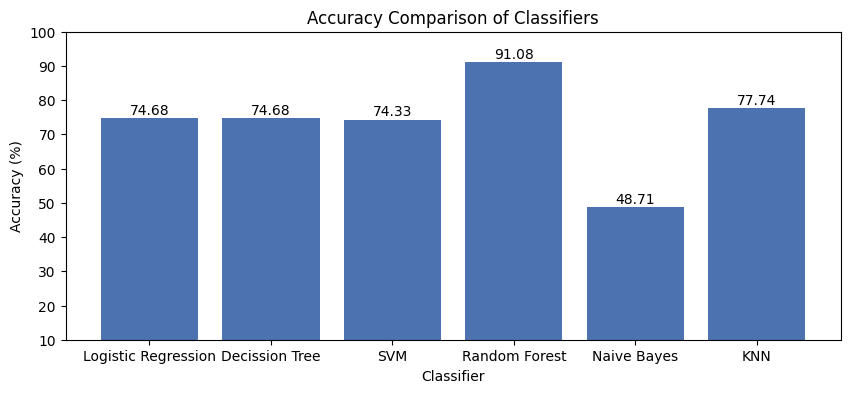

In [25]:
# Define the classifiers and their accuracies
classifiers = ['Logistic Regression','Decission Tree','SVM','Random Forest','Naive Bayes','KNN']
accuracies = [74.68,74.68, 74.33,91.08,48.71,77.74]

#Plot bar chart
plt.figure(figsize=(10, 4))
bars = plt.bar(classifiers, accuracies, color=['#4c72b0', '#4c72b0', '#4c72b0'])

# Adjust ylim to show differences clearly
plt.ylim(10, 100)

plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Displaying the accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()